# Assignment 10: Nested Spheres

Simulation is an incredibly useful tool in data science.  We can use simulation to evaluate how algorithms perform against ground truth, and how algorithms compare to one another.

In this assignment, you will be implementing and extending the nested spheres simulation study found in *Elements of Statistical Learning* page 339.  

# Nested Spheres

Consider a dataset which contains 10 features $X_1 \,, X_2 \,, \cdots \,, X_{10}$.  The features are standard independent Gaussian random variables.  That is to say

$$ X_j \sim \operatorname{Normal}(0,1) \quad \forall j = 1 \dots 10$$

We are going to use these features to study a classification problem.  You will have to create the target variable, $Y$ by computing the following rule:

$$ Y = \begin{cases}  1 \quad \mbox{ if } \sum_{j=1}^{10} X^2_j>9.34 \\ -1 \quad  \mbox{else} \end{cases}$$

# The Simulation Study

Follow these steps to complete the assignment. 

## Steps:

1. Generate a training data set of 2000 observations according to the description above.  Label each of these training examples according to the rule above.

2. Train a bagged estimator, a random forrest with `max_features=1`, a random forest with `max_features=3`, and an additional model of your choice (you can increase max features again, or you can explore a boosted estimator).  Use 500 trees in your random forests and bagged estimator.

3.  Generate a testing data set of 10,000 observations according to the description above.  Label each of these training examples according to the rule above.

4.  Use each model to predict on the testing data.  Record the testing error rate (that is 1 - accuracy).


Repeat these steps 50 times.  Plot the error rates as a box plot by model to complete the assignment.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from tqdm import tqdm


def generate_data(N):
    y = []
    if N<=0:
        raise ValueError('N must be a postivie integer')
    if isinstance(N,float):
        N = int(np.floor(N))

    X = np.random.normal(size =(N,10))

    # Calculate the sum to determine if y=0 or y=1
    radius_squared = np.linalg.norm(X,2,axis =1)**2
    for i in range(N):
        
        if radius_squared[i] > 9.32:
            y.append(1)
        else:
            y.append(-1)

    return X,y

generate_data(2000)


(array([[-0.24594636,  0.20254135, -1.25191147, ...,  1.40216629,
         -0.55623823, -1.15251548],
        [-2.22817131, -0.56179409, -0.87517217, ...,  0.87626553,
         -1.05882616, -0.60347573],
        [-0.73157874, -0.35014363, -0.39947529, ..., -0.88596345,
          0.48348312, -0.95525002],
        ...,
        [-0.19634223,  1.60161748, -1.61219166, ...,  1.00191579,
         -0.31761791,  0.93090015],
        [ 0.17740096,  0.02614584,  0.32618107, ..., -0.12855633,
          0.32092743,  0.12657957],
        [-0.64368962, -0.30829321, -0.60685177, ...,  1.43293005,
         -2.69730608, -0.53445266]]),
 [1,
  1,
  1,
  -1,
  -1,
  1,
  -1,
  -1,
  -1,
  1,
  -1,
  1,
  -1,
  -1,
  -1,
  1,
  1,
  -1,
  -1,
  1,
  1,
  1,
  -1,
  -1,
  1,
  -1,
  -1,
  1,
  1,
  -1,
  -1,
  -1,
  1,
  -1,
  -1,
  -1,
  1,
  1,
  -1,
  1,
  -1,
  -1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  1,
  -1,
  -1,
  1,
  -1,
  -1,
  -1,
  -1,
  1,
  1,
  1,
  1

In [2]:
number_of_simulations = 50
err = np.zeros(number_of_simulations)
err_rf1 = np.zeros(number_of_simulations)
err_rf2 = np.zeros(number_of_simulations)
err_rf3 = np.zeros(number_of_simulations)


for i in tqdm(range(number_of_simulations)):


    # Step 1: 
    # Generate a training data set of 2000 observations according to the description above.  
    # Label each of these training examples according to the rule above.

    Xtrain,ytrain =generate_data(2000)
    
    # Instantiate Models
    bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators =500)
    rf1 = RandomForestClassifier(n_estimators = 500, max_features=1)
    rf2 = RandomForestClassifier(n_estimators = 500, max_features=3)
    rf3 = RandomForestClassifier(n_estimators = 500, max_features=5)
    
    # Step 2: Train a bagged estimator
    # Use 500 trees in your random forests and bagged estimator.
    bag.fit(Xtrain, ytrain)
    rf1.fit(Xtrain, ytrain)
    rf2.fit(Xtrain, ytrain)
    rf3.fit(Xtrain, ytrain)
    
    #Step 3:
    # Generate a testing data set of 10,000 observations according to the description above.  
    # Label each of these training examples according to the rule above.
    Xtest, ytest = generate_data(10000)

    # Step 4:
    # Use each model to predict on the testing data.  
    ypred = bag.predict(Xtest)
    ypred_rf1 = rf1.predict(Xtest)
    ypred_rf2 = rf2.predict(Xtest)
    ypred_rf3 = rf3.predict(Xtest)
    
    # Record the testing error rate (that is 1 - accuracy).
    
    err[i] = 1-accuracy_score(ytest,ypred)

    err_rf1[i] = 1-accuracy_score(ytest,ypred_rf1)
    err_rf2[i] = 1-accuracy_score(ytest,ypred_rf2)
    err_rf3[i] = 1-accuracy_score(ytest,ypred_rf3)

#Plot the error rates as a box plot by model to complete the assignment.

100%|██████████| 50/50 [16:53<00:00, 18.06s/it]


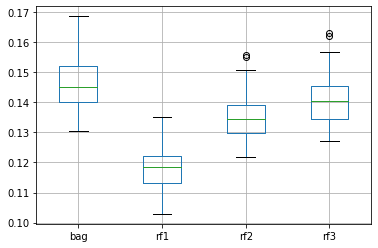

In [3]:
estimators = {'bag':err,'rf1':err_rf1,'rf2':err_rf2,'rf3':err_rf3}

df = pd.DataFrame(estimators)

df

df.boxplot()
